In [1]:
from kws.trainer import Trainer
from kws.config import UncompressedConfig, SmallConfig

In [2]:
base_config = UncompressedConfig()
trainer = Trainer(base_config)
# trainer.train()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: i_vainn. Use `wandb login --relogin` to force relogin


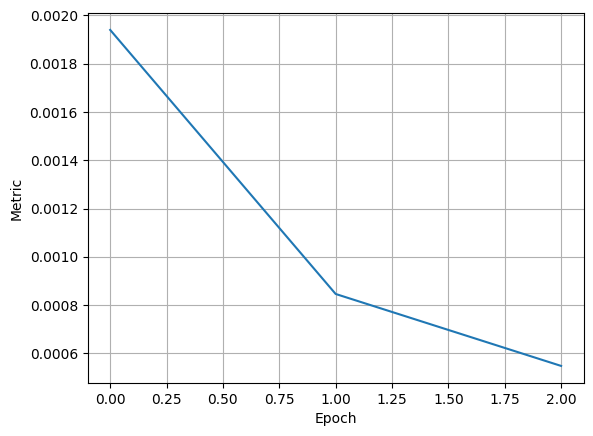

END OF EPOCH 2


 49%|████▉     | 200/405 [00:22<00:30,  6.68it/s]

In [2]:
trainer = Trainer(UncompressedConfig())

trainer.train_distilled(SmallConfig(alpha=0.05, num_epochs=40, ), 'cool-haze-8-27-0.0000_model.pth')

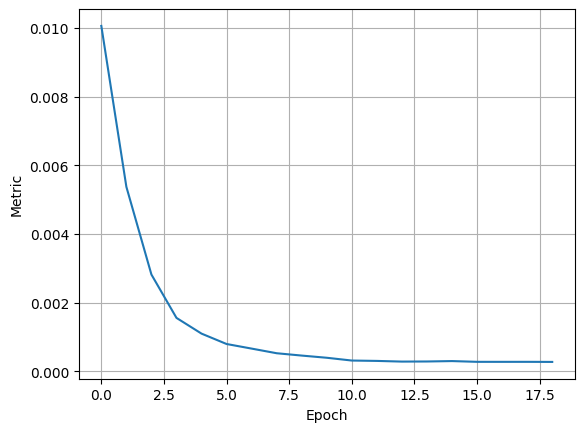

END OF EPOCH 18


 98%|█████████▊| 395/405 [00:43<00:01,  9.18it/s]


ValueError: Tried to step 8092 times. The specified number of total steps is 8090

In [2]:
trainer = Trainer(SmallConfig())
trainer.train()

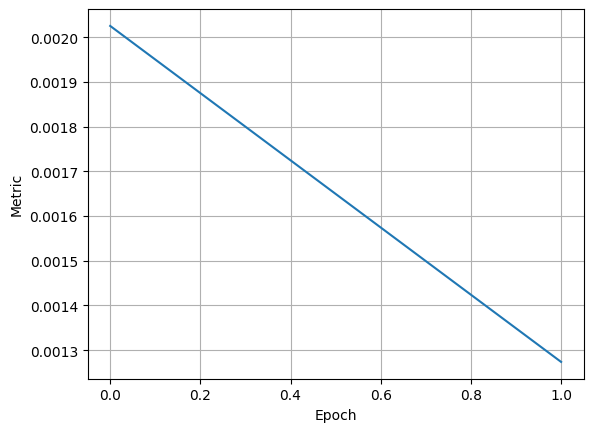

END OF EPOCH 1


 74%|███████▍  | 301/405 [00:24<00:08, 12.19it/s]


KeyboardInterrupt: 

In [5]:
trainer = Trainer(SmallConfig())
trainer.train()

In [9]:
from kws.models import StreamCRNN
import torch

def averaging(base_model, config, paths):
    target_state_dict = base_model(config).state_dict()
    for key in target_state_dict:
        target_state_dict[key].data.fill_(0.)
        
    for path in paths:
        model = base_model(config)
        model.load_state_dict(torch.load(path))
        state_dict = model.state_dict()
        for key in target_state_dict:
            if target_state_dict[key].data.dtype != torch.float32:
                continue
            target_state_dict[key].data += state_dict[key].data.clone() / len(paths)
            
    return target_state_dict

first_chkpt = 12
paths = [f'normal_model_{x}.pth' for x in range(first_chkpt, 20)]
avg_model = StreamCRNN(base_config)
avg_model.load_state_dict(averaging(StreamCRNN, base_config, paths))

<All keys matched successfully>

In [11]:
from test_performance import test_preformance

test_preformance(base_config, avg_model)

Exception ignored in: <function tqdm.__del__ at 0x7f967130ee50>
Traceback (most recent call last):
  File "/Users/egoriya/miniconda/lib/python3.9/site-packages/tqdm/std.py", line 1162, in __del__
    self.close()
  File "/Users/egoriya/miniconda/lib/python3.9/site-packages/tqdm/notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
102it [00:18,  5.44it/s]


{'memory': 0.10348224639892578,
 'au_fa_fr': 4.5866570708501566e-05,
 'time': 0.005779369204652076,
 'MACs': 54911167.058823526,
 'num_params': 25387}

In [12]:
first_chkpt = 15
paths = [f'normal_model_{x}.pth' for x in range(first_chkpt, 20)]
avg_model = StreamCRNN(base_config)
avg_model.load_state_dict(averaging(StreamCRNN, base_config, paths))

test_preformance(base_config, avg_model)

102it [00:18,  5.45it/s]


{'memory': 0.10348224639892578,
 'au_fa_fr': 4.185041118640664e-05,
 'time': 0.0066764284582699045,
 'MACs': 54911167.058823526,
 'num_params': 25387}

In [13]:
first_chkpt = 18
paths = [f'normal_model_{x}.pth' for x in range(first_chkpt, 20)]
avg_model = StreamCRNN(base_config)
avg_model.load_state_dict(averaging(StreamCRNN, base_config, paths))

test_preformance(base_config, avg_model)

102it [00:19,  5.22it/s]


{'memory': 0.10348224639892578,
 'au_fa_fr': 3.680186593277766e-05,
 'time': 0.006728214376112994,
 'MACs': 54911167.058823526,
 'num_params': 25387}

In [14]:
first_chkpt = 19
paths = [f'normal_model_{x}.pth' for x in range(first_chkpt, 20)]
avg_model = StreamCRNN(base_config)
avg_model.load_state_dict(averaging(StreamCRNN, base_config, paths))

test_preformance(base_config, avg_model)

102it [00:19,  5.13it/s]


{'memory': 0.10348224639892578,
 'au_fa_fr': 3.579931793914922e-05,
 'time': 0.00802762835633521,
 'MACs': 54911167.058823526,
 'num_params': 25387}